# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
%matplotlib notebook
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad lazaro cardenas
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | kirakira
Processing Record 6 of Set 1 | swift current
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 16 of Set 1 | bogatoye
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | douentza
Processing

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ciudad lazaro cardenas,17.9583,-102.2000,28.62,76,71,2.17,MX,1723129292
1,port-aux-francais,-49.3500,70.2167,1.31,71,99,12.04,TF,1723129293
2,grytviken,-54.2811,-36.5092,-7.52,82,100,5.62,GS,1723129294
3,wailua homesteads,22.0669,-159.3780,21.53,81,28,3.58,US,1723129295
4,kirakira,-10.4544,161.9205,25.43,88,100,4.28,SB,1723129296


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,28.62,76,71,2.17,MX,1723129292
1,port-aux-francais,-49.3500,70.2167,1.31,71,99,12.04,TF,1723129293
2,grytviken,-54.2811,-36.5092,-7.52,82,100,5.62,GS,1723129294
3,wailua homesteads,22.0669,-159.3780,21.53,81,28,3.58,US,1723129295
4,kirakira,-10.4544,161.9205,25.43,88,100,4.28,SB,1723129296


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

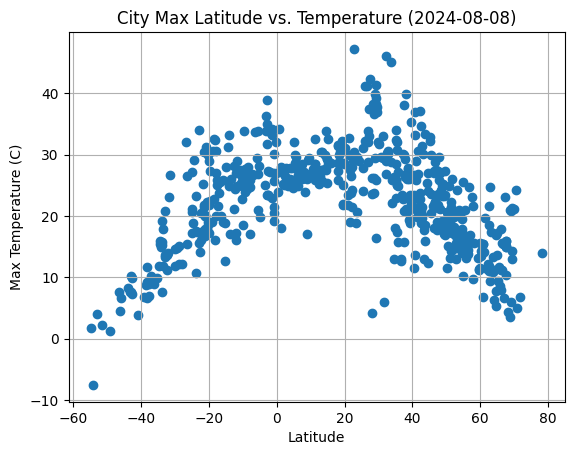

In [5]:
current_date = datetime.now().strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

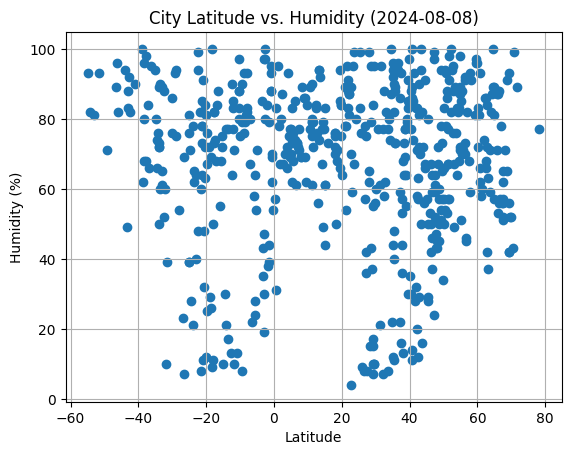

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

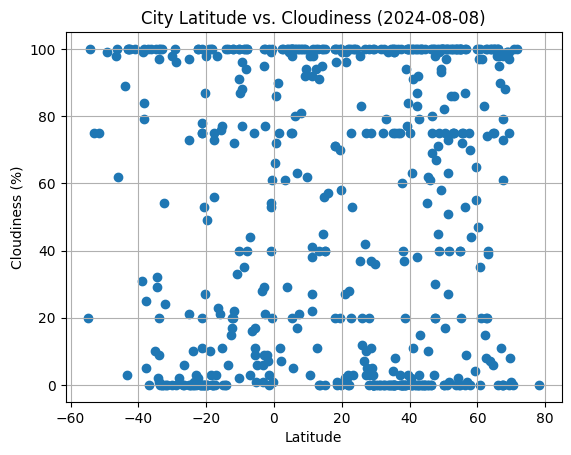

In [7]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

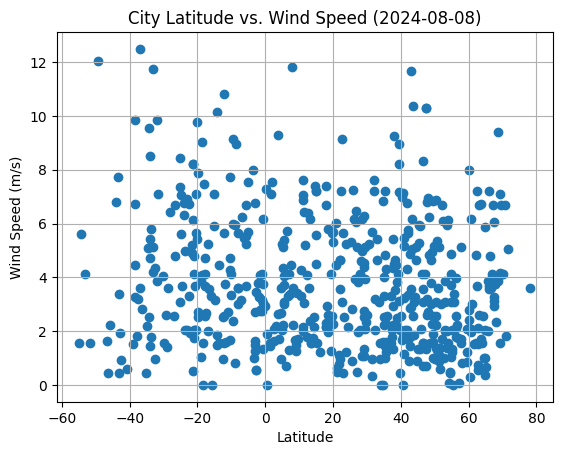

In [8]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    print(f"The r^2-value is: {rvalue**2}")

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=(annotate_pos[0], annotate_pos[1]), fontsize=15, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,28.62,76,71,2.17,MX,1723129292
3,wailua homesteads,22.0669,-159.3780,21.53,81,28,3.58,US,1723129295
5,swift current,50.2834,-107.8014,11.45,66,0,2.57,CA,1723129298
8,iskateley,67.6803,53.1512,15.97,51,0,3.75,RU,1723129301
9,georgetown,5.4112,100.3354,29.97,62,20,3.09,MY,1723129036


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,1.31,71,99,12.04,TF,1723129293
2,grytviken,-54.2811,-36.5092,-7.52,82,100,5.62,GS,1723129294
4,kirakira,-10.4544,161.9205,25.43,88,100,4.28,SB,1723129296
6,puerto natales,-51.7236,-72.4875,2.25,93,75,1.54,CL,1723129299
7,puerto baquerizo moreno,-0.9000,-89.6000,20.55,88,40,4.12,EC,1723129300


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.377647740921297


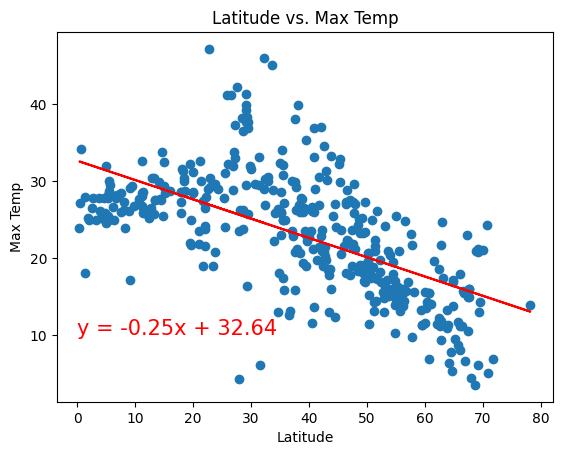

In [12]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temp', 
    'Latitude vs. Max Temp',
    (0, 10)
)

The r^2-value is: 0.6408617809761096


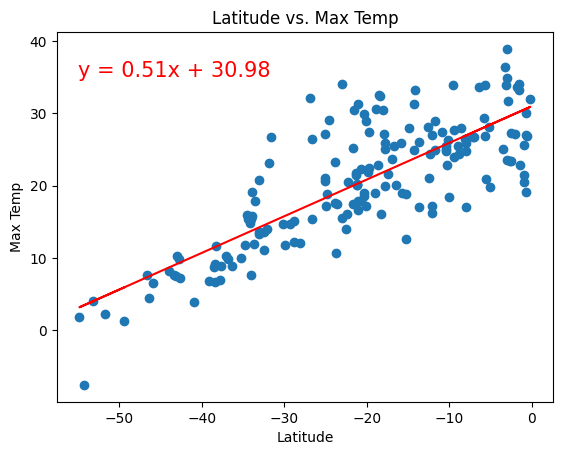

In [13]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temp', 
    'Latitude vs. Max Temp',
    (-55, 35)
)

**Discussion about the linear relationship:** 
The above linear regressions model the correlation of the Maximum Temperature and Latitude of a location.
While both linear regressions confirm that temperatures are warmer closer to the equator, the Southern Hemisphere shows a significantly higher positive correlation compared to the Northern Hemisphere. This suggests that additional factors affect how influential the distance from the equator is in each hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0007285917135267275


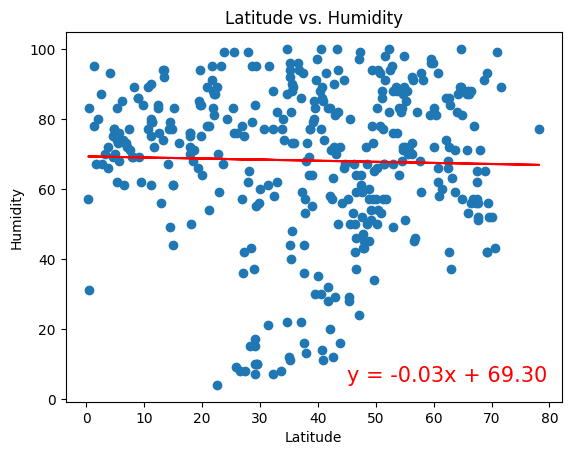

In [14]:
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity', 
    'Latitude vs. Humidity',
    (45,5)
)

The r^2-value is: 0.03730431431846823


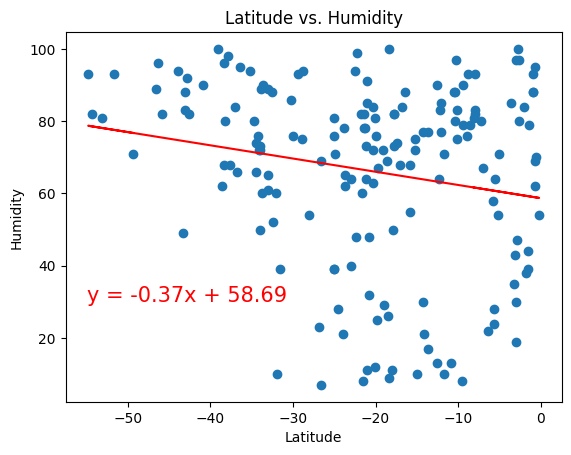

In [15]:
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity', 
    'Latitude vs. Humidity',
    (-55,30)
)

**Discussion about the linear relationship:** 
The above linear regressions model the correlation of Humidity and Latitude of a location.
Both hemispheres show little correlation between latitude and humidity. Further research into the causes of humidity indicate that local climate and georaphy play the largest role in humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0006397392908971543


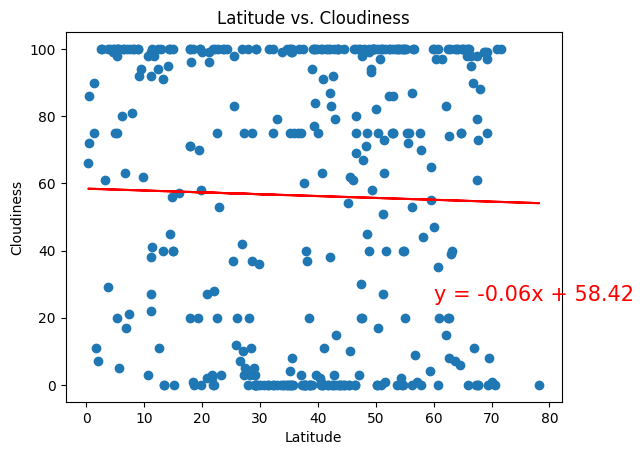

In [16]:
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness', 
    'Latitude vs. Cloudiness',
    (60,25)
)

The r^2-value is: 0.012442524153989058


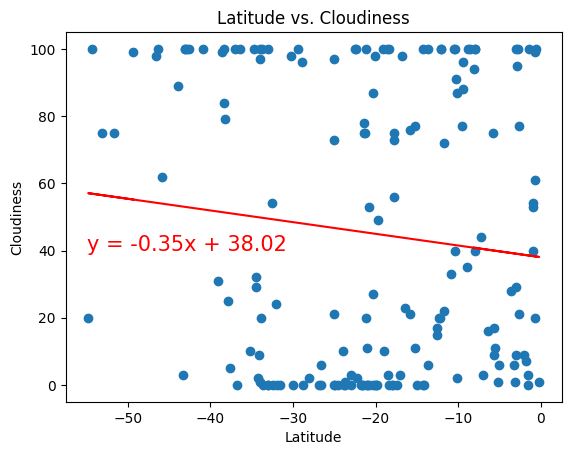

In [23]:
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness', 
    'Latitude vs. Cloudiness',
    (-55,40)
)

**Discussion about the linear relationship:** 
The above linear regressions model the correlation between Cloudiness and Latitude of a location.
There is little correlation between cloudiness and latitude. A similar model of Cloudiness and Humidity shows a higher positive correlation in both hemispheres, indicating that climate and geography play a larger role in a locations cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.004607539121026772


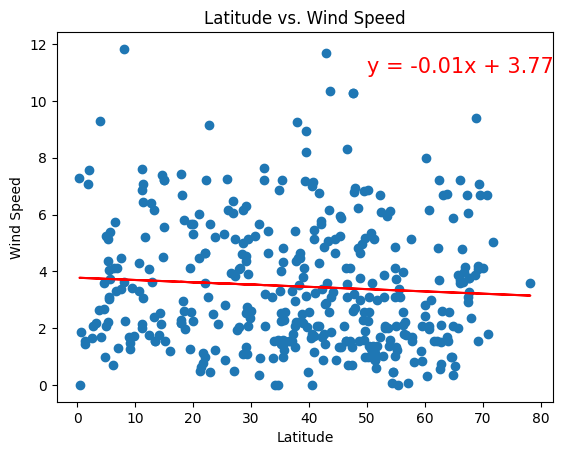

In [28]:
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed', 
    'Latitude vs. Wind Speed',
    (50,11)
)

The r^2-value is: 0.0032769814544819733


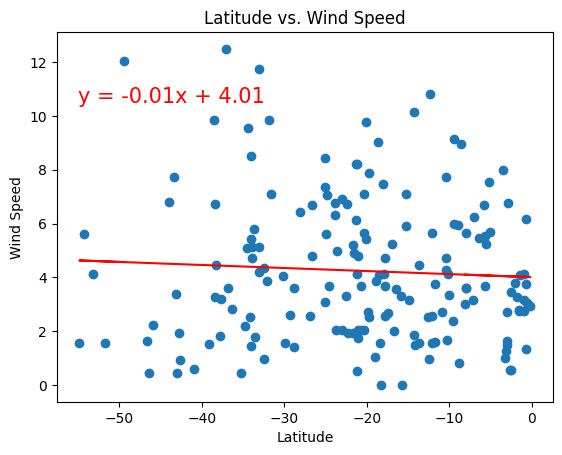

In [27]:
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed', 
    'Latitude vs. Wind Speed',
    (-55,10.5)
)

**Discussion about the linear relationship:** 
The above linear regressions are modeling the correlation of Wind Speed and Latitude in the Norhtern Hemesphere and the Southern Hemisphere.
Both models show very little correlation between Wind Speed and Latitude, with r^2 values of 0.0046 and 0.0033 repsectively. As with Humidity and Cloudiness, it is safe to assume climate and geography play a much larger role in wind speed.